# Telco-churn Classification Project
--------------------------------------
-------------------------------------
 #### Robert Murphy
 
 #### May 5, 2021

## Project Planning

- Create a README.md which contains a data dictionary, project objectives, business goals, initial hypothesis.
- Acquire the telco dataset from the Codeup databse, create a function which will use a sql query and pull specific tables save this function in a acquire.py
- Prep the telco dataset and clean it as well, remove unwanted data, make alterations to the datatypes.
- Change any categorical variables into a binary categorical. Create a function to simplify this process and include it in a prepare.py
- Calculate your baseline accuracy and use this for comparing adequacy of the model.
- Train three different classification models.
- Evaluate the models on the train and validate datasets.
- Choose the model which performs the best, then run that model on the test dataset.
- Create csv file.
- Present conclusions and main takeaways.





--------------------------------------

### Executive Summary:
- There is six features which appear to be significant drivers in churn amongst customers.
- Exploration of the data showed a combination of features can be useful in predicting churn.
- The logistical model performed the best at predicting churn.


### Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from env import host, user, password
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy import stats
from pydataset import data
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import prepare
import model

from env import host, user, password




# ignore warnings
import warnings
warnings.filterwarnings("ignore")

---------------------------------

# Acquire Stage:

### Main Objective:
- Connect to the Codeup DB and bring in the Telco-churn dataset

In [10]:
# creating df using function within our 
telco_churn_df = acquire.get_telco_churn_data()

In [53]:
# looking at the values within the records and fields.
telco_churn_df.head(3)

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,DSL,fiber_optic,Month-to-month_contract,one_year,two_year_contract,auto_pay,tenure_year
customer_id,,,,,,,,,,,,,,,,,
0016-QLJIS,1,0,1,1,65,1,1,90.45,5957.90,0,1,0,0,0,1,0,5.0
0017-DINOC,0,0,0,0,54,0,1,45.20,2460.55,0,1,0,0,0,1,1,4.0
0019-GFNTW,1,0,0,0,56,0,1,45.05,2560.10,0,1,0,0,0,1,1,5.0


In [12]:
# looking into the shape of the DF
# 7043 Records and 27 Fields
telco_churn_df.shape

(7043, 27)

In [13]:
# looking at the data types within the dataframe.
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [14]:
# stats of the numerical columns with range added.
telco_churn_df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


## Acquire Takeaways:

- Created a sql query and implemented it within a function to acquire Telco-churn dataframe from the Codeup DB.
- Imported my get_telco_churn_data function from my acquire.py file, which generated a local csv.
- The shape of the dataframe is 7043 records and 27 Fields.
- Looking at the data frame using .info() can see a majority of dtype is 18 object, then numeric being 1 float64 and 8 int64.
- Appears total_charges is an object and needs to be converted to a float.
- Several fields provide similar information, would be worth dropping some.




----------------------------------

# Prepare Stage:

### Main Objective:

#### House cleaning.
- Removal of non essential duplicate records and fields.
- Inspecting the DF for data inconsitency and correcting these errors.
- Inspecting the DF for empty and NaN values and replacing these empty and NaN values with relative data.
- Changing datatypes when deemed necessary.
- Change several fields a binary categorical.


In [15]:
#see prepare.py for prep_telco function
telco_churn_df = prepare.prep_telco(telco_churn_df)

In [16]:
# decrease in records and fields from 7043 x 27, 11 records contained NaN values, these were dropped.
# shape of dataframe is 7032 records, and 20 fields.
telco_churn_df.shape

(7032, 17)

In [17]:
# duplicate records and fields removed, a few fields changed to binary categorical, index changed to customer id.
telco_churn_df.head(5)

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,DSL,fiber_optic,Month-to-month_contract,one_year,two_year_contract,auto_pay,tenure_year
customer_id,,,,,,,,,,,,,,,,,
0016-QLJIS,1,0,1,1,65,1,1,90.45,5957.90,0,1,0,0,0,1,0,5.0
0017-DINOC,0,0,0,0,54,0,1,45.20,2460.55,0,1,0,0,0,1,1,4.0
0019-GFNTW,1,0,0,0,56,0,1,45.05,2560.10,0,1,0,0,0,1,1,5.0
0056-EPFBG,0,0,1,1,20,0,1,39.40,825.40,0,1,0,0,0,1,1,2.0
0078-XZMHT,0,0,1,0,72,1,1,85.15,6316.20,0,1,0,0,0,1,1,6.0


In [18]:
#viewing dtype changes.
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7032 non-null   int64  
 1   senior_citizen            7032 non-null   int64  
 2   partner                   7032 non-null   int64  
 3   dependents                7032 non-null   int64  
 4   tenure_months             7032 non-null   int64  
 5   phone_service             7032 non-null   int64  
 6   internet_service_type_id  7032 non-null   int64  
 7   monthly_charges           7032 non-null   float64
 8   total_charges             7032 non-null   float64
 9   churn                     7032 non-null   int64  
 10  DSL                       7032 non-null   uint8  
 11  fiber_optic               7032 non-null   uint8  
 12  Month-to-month_contract   7032 non-null   uint8  
 13  one_year                  7032 non-null   uint8  
 14

In [19]:
# use imported function telco_split to split the data, checking shape of train, validate, test.
train, validate, test = prepare.telco_split(telco_churn_df)
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

Prepare Takeaways:

- Implemented a function which did alot of the "house cleaning".
- Removal of unncessary fields and records.
- Changed total_charges from object to a float.
- Customer_id is now the dataframe index.
- Several fields changed to a binary categorical.



-----------------------------------

# Explore Stage:

### Main Objective:
- Visualizing the data, looking for trends.
- Visualization showing overall churn rate.


In [20]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

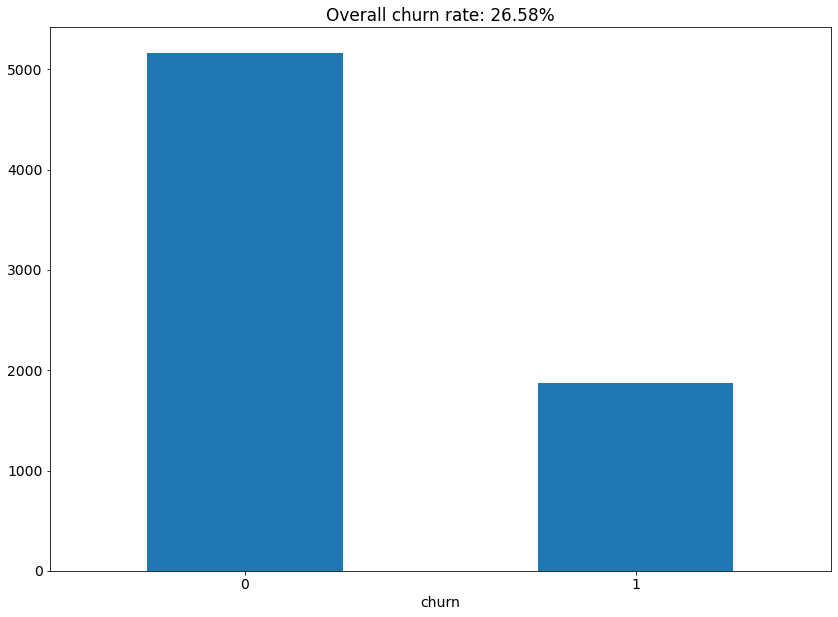

In [50]:
#looking at the overall churn rate.
telco_churn_df.churn.value_counts().sort_index().plot.bar()
churn_rate = telco_churn_df.churn.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('churn')
plt.xticks(rotation = 0) 
plt.show()

In [22]:
#correlation table
train_corr = train.corr().reset_index()
train_corr.set_index('index', drop = True, inplace = True)
train_corr = pd.DataFrame(train_corr[train_corr.index[9]]).sort_values(by ='churn')
train_corr

,churn
index,
tenure_months,-0.350081
tenure_year,-0.348994
two_year_contract,-0.301909
auto_pay,-0.216455
total_charges,-0.194262
one_year,-0.178959
dependents,-0.149845
partner,-0.135987
DSL,-0.118365


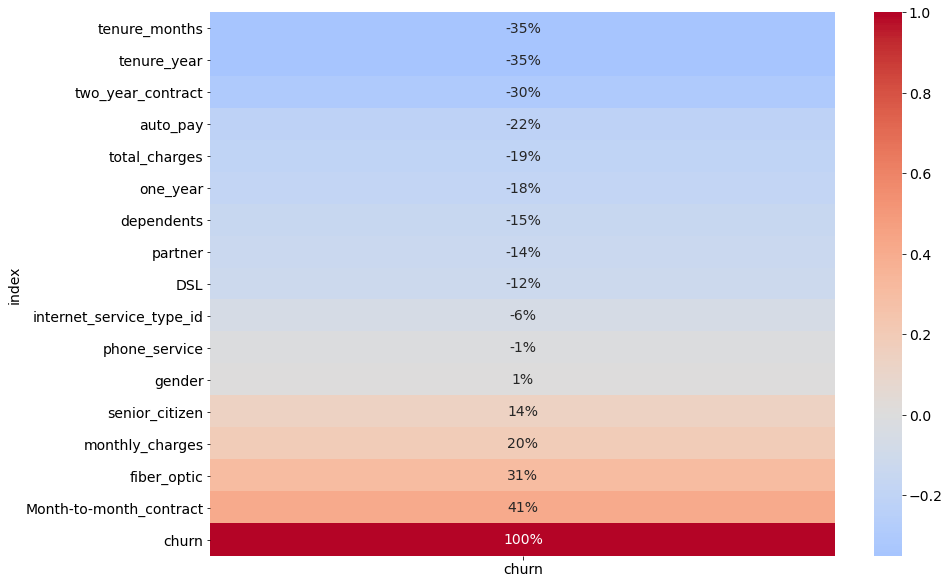

In [23]:
#Heatmap
#The heat map clearly shows there is a correlation between churn and fiber optic, electronic checking and monthly charges.
plt.figure(figsize=(14, 10))
sns.heatmap(train_corr, cmap = 'coolwarm', center = 0, annot = True, fmt = '.0%',)
plt.show()

#### Heat Map Takeaways:

Factors which are driving churn are Month-to-month contract, fiber optic, monthly charges, auto-pay, tenure_months, and two_year_contract.

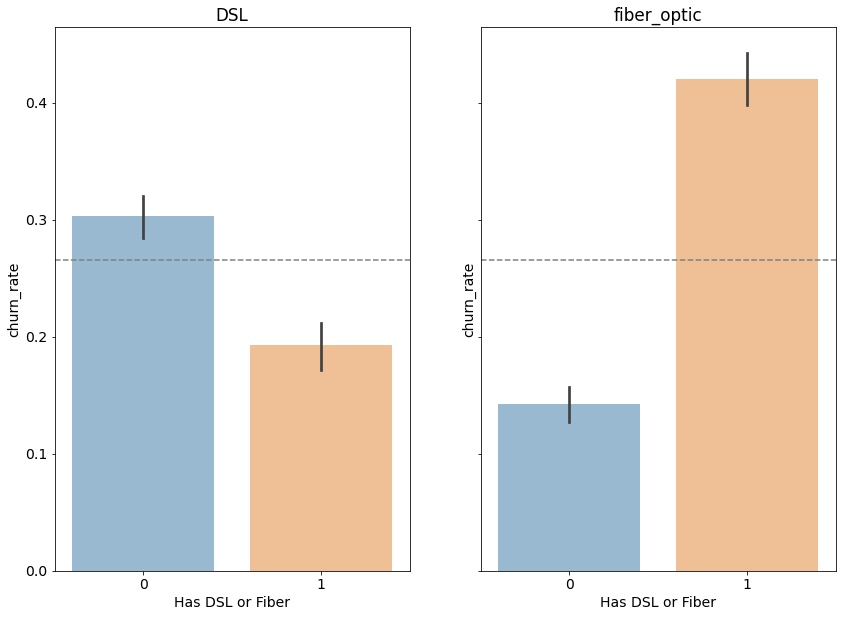

In [24]:
#Comparing internet service types, with firber optic being a driving factor for churn.
#specified features
features = ['DSL', 'fiber_optic',]
#overall churn rate
churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Has DSL or Fiber')
    ax[i].set_ylabel('churn_rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

#### Bar plot Takeaways:

Customers who have the internet service fiber optic have a higher churn rate than those who dont.#looking at the driving factor of churn auto_pay

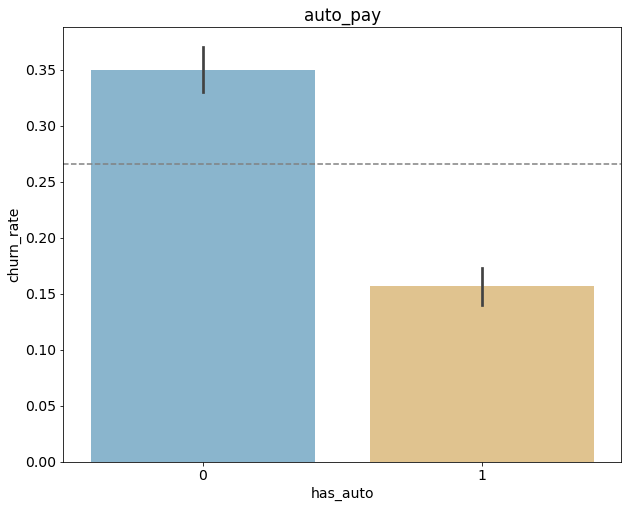

In [25]:
#looking at the driving factor of churn auto_pay
features = ['auto_pay']
plt.figure(figsize=(10, 8))
churn_rate = train.churn.mean()
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data = train, alpha=0.5, palette ='colorblind')
    plt.xlabel('has_auto')
    plt.ylabel('churn_rate')
    plt.title(feature)
    plt.axhline(churn_rate, ls='--', color='grey')

#### Bar plot Takeaways:

Customers who use a payment method which has no auto pay method churn at a higher rate than those who do.

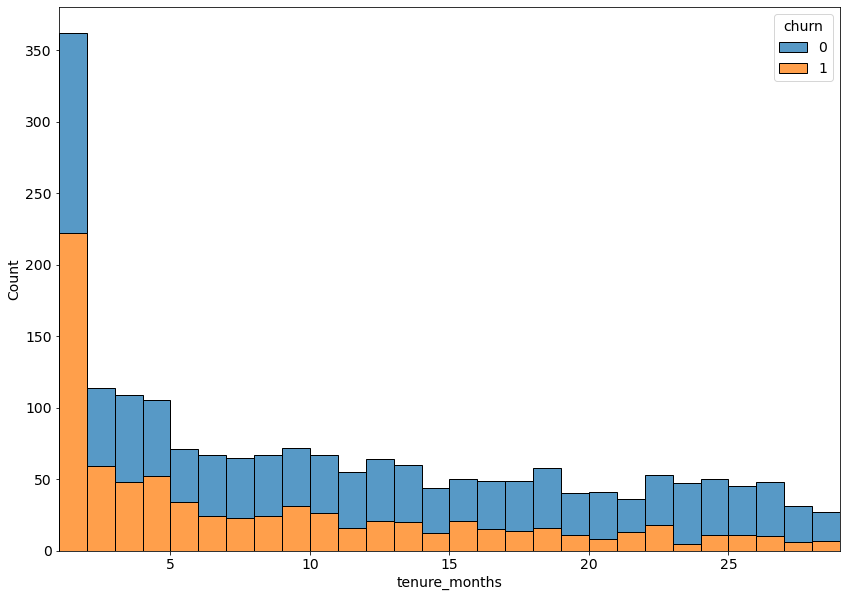

In [26]:
plt.figure(figsize=(14, 10))
sns.histplot(data=train, x='tenure_months', hue='churn', multiple='stack',binwidth =1)
plt.xlim(1,train.tenure_months.median())
plt.show()

####  Histogram Takeaways:

Immediately you can see the rate of churn is highest within the first month, as you increase in tenure months the tenure count begins to dissapate.

### Main takeaway from charts and heatmap:

- Based on the Heatmap its best to focus on features with a precentage value of greater than 19% and less than -19%.
- In total we will focus on 7 features: total_charges, monthly_charges, auto_pay, two_year, tenure_months, fiber_optic, Month-to-month_contract.
- We can see from the charts and heatmap these are factors driving churn.

---------------------------------

## Hypothesis Testing:

### Hypothesis Test 1

- #### Hypothesis Null : autopay method is independent of churn.

- #### Hypothesis Alternative : "autopay method is not independent of churn".

#### Will utilize a CHI^2 Test:
- churn(categorical)
- auto_pay (categorical)

In [27]:
observed1 = pd.crosstab(train.auto_pay, train.churn)
# run the chi^2 test
chi2, p, degf, expected = stats.chi2_contingency(observed1)
print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
# set alpha
alpha = 0.05

null_hypothesis = "autopay method is independent of churn"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

Observed

[[1448  778]
 [1443  268]]
---
Expected

[[1634  591]
 [1256  454]]
---

chi^2 = 183.4720
p     = 0.0000

We can reject the null hypothesis that autopay method is independent of churn


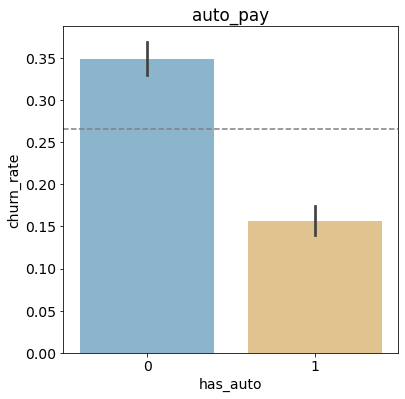

In [28]:
#looking at the driving factor of churn auto_pay
features = ['auto_pay']
plt.figure(figsize=(6, 6))
churn_rate = train.churn.mean()
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data = train, alpha=0.5, palette ='colorblind')
    plt.xlabel('has_auto')
    plt.ylabel('churn_rate')
    plt.title(feature)
    plt.axhline(churn_rate, ls='--', color='grey')

### Hypothesis Test 2

- #### Hypothesis Null : internet service type fiber optic is independent of churn.


- #### Hypothesis Alternative : "internet service type fiber optic is not independent of churn".




#### Will utilize a CHI^2 Test:

churn(categorical)
fiber_optic (categorical)

In [29]:
observed1 = pd.crosstab(train.fiber_optic, train.churn)

# run the chi^2 test
chi2, p, degf, expected = stats.chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "internet service type fiber optic is independent of churn"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

Observed

[[1880  312]
 [1011  734]]
---
Expected

[[1609  582]
 [1281  463]]
---

chi^2 = 384.2585
p     = 0.0000

We can reject the null hypothesis that internet service type fiber optic is independent of churn


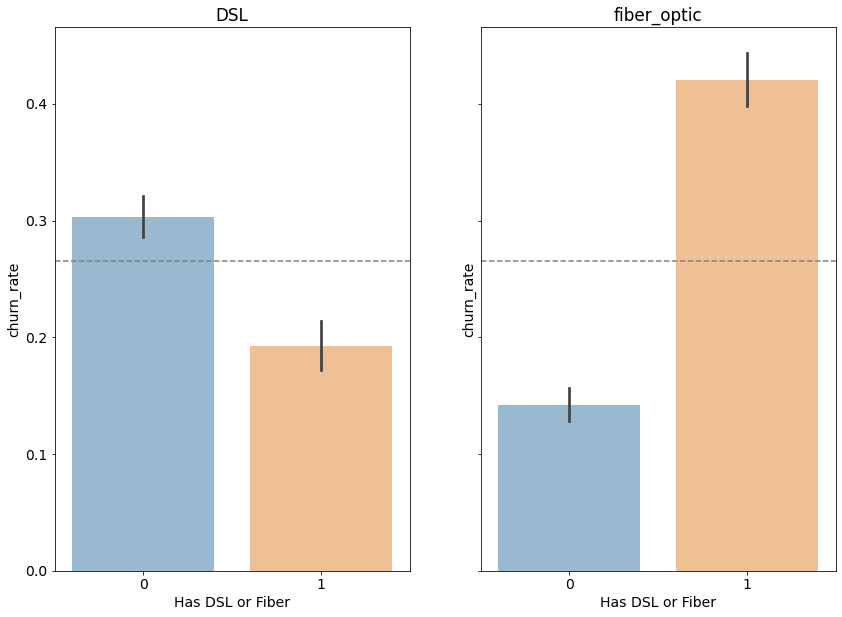

In [30]:
features = ['DSL', 'fiber_optic',]
#overall churn rate
churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Has DSL or Fiber')
    ax[i].set_ylabel('churn_rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

### Hypothesis Test 3

- #### Hypothesis Null : there is no difference between tenure_months and churn.


- #### Hypothesis Alternative : there is a difference between tenure_months and churn.

Note: One of the assumptions of the t-test is that the continuous variable is normally distributed.Number of observations is greater than 30.

In [31]:
#compare the mean and median.
train.tenure_months.mean(), train.tenure_months.median()


(32.49428498856998, 29.0)

<AxesSubplot:xlabel='tenure_months', ylabel='Density'>

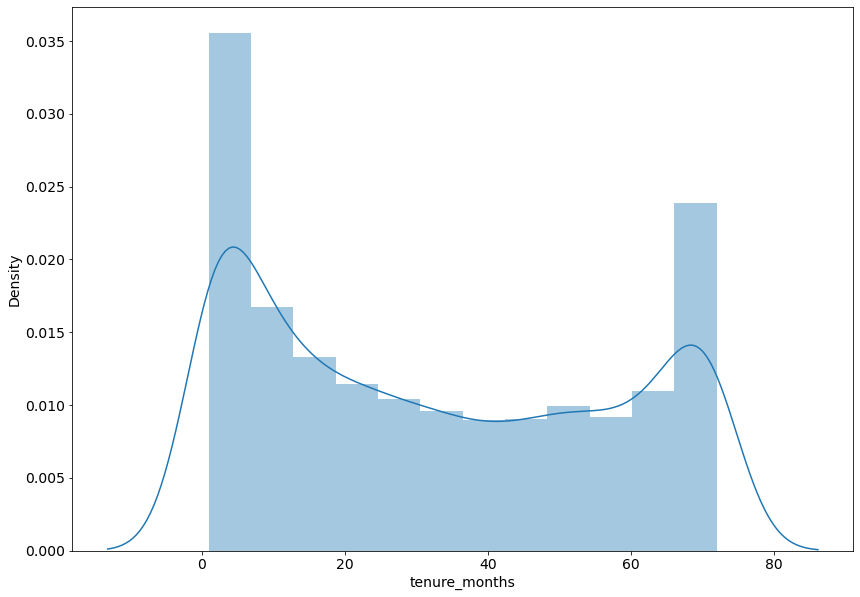

In [32]:
# Chart for distribution Analysis
sns.distplot(train.tenure_months)

In [33]:
#cont vs categorical
# make a subset 
x1 = train.tenure_months

# make a subset for 
x2 = train.churn.mean()

# run a 1 sample, 1 tail t-test
t_stat, p = stats.ttest_1samp(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "there is no difference between tenure_months and churn."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 81.9624
p_value = 0.0000

We can reject the null hypothesis that there is no difference between tenure_months and churn.


Distribution Plot Takeaway:

- This is a bimodal distribution so it doesnt eactly show a normal distribution. 
- The mean and median of the distribution are nearly similar and the number of observations is more than 30.
- So we can assume its normally distributed.

# Modeling & Evaluation:

In [34]:
#Begin by asking what is our Baseline Prediction? We know our target is churn.
#Based on value_counts no churn (0) is our baseline prediction
train.churn.value_counts() 

0    2891
1    1046
Name: churn, dtype: int64

In [35]:
#Calculate our baseline accuracy.
#Create new field which has our baseline prediciton as no churn (0). 
train['baseline_prediction'] = 0
baseline =(train.baseline_prediction == train.churn).mean()
baseline 
#baseline accuracy is 73.43%

0.7343154686309372

In [36]:
#do not need baseline_prediction_column anymore
train.drop(columns ='baseline_prediction', inplace = True)
#Baseline accuracy means for each observation my accuracy in predicting churn would be 73%


In [37]:
#features list with % greater than 19% and less than 19%. Followed by churn our target
x_col = features_list = ['total_charges', 'monthly_charges', 'auto_pay', 'two_year_contract', 'fiber_optic', 'Month-to-month_contract']
y_col = 'churn'

In [38]:
#defining our features and target for our train, validate and test sets.
X_train, y_train = train[x_col], train[y_col]
X_validate, y_validate = validate[x_col], validate[y_col]
X_test, y_test = test[x_col], test[y_col]

### MVP Models:
 - use function from model.py to use the above specified target and features with a logistic regrerssion, decisicon tree, and random forest classifiers.
 - model train and validate accuracy must be greater than the baseline accuracy of 73% in order to be considered viable.

In [39]:
#function which generates confusion matrix, train accuracy, validate accuracy, classification report.
model.model_metrics(X_train, y_train, X_validate, y_validate)

--------------------------

LogisticRegression(random_state=1349)
train set

train accuracy: 78.97%
classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2891
           1       0.63      0.51      0.56      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.70      0.71      3937
weighted avg       0.78      0.79      0.78      3937



        True Positive Rate:51.34%,  
        False Positive Rate :11.03%,
        True Negative Rate: 88.97%,  
        False Negative Rate: 48.66%
------------------------
validate set

validate accuracy: 78.79%
classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1239
           1       0.62      0.52      0.57       449

    accuracy                           0.79      1688
   macro avg       0.73      0.70      0.71      1688
weighted avg       0.78      0.79      0

## MVP Models Takeaway:

- Since our baseline accuracy is 73% each models train and validate accuracy pecrentage was higher than the baseline meaning they are all viable.
- The best performing models were logistical regression and decision tree, these models performed better than random forest by 2%.
- My choice would be the logistical regression since the difference in the train and validate accuracy is less than .2 %.



-------------------

## Evaluate on test dataset:

In [40]:
logit = LogisticRegression(random_state =1349)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)
print('Test Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407



## Create Predictions CSV
- Create a CSV file with  probability of selected features,  prediction of churn (1=churn, 0=not_churn)
- These predictions are based on best performing model: logistic regression.  


In [41]:
# use the model to make predictions.
logit_pred_test = logit.predict(X_test[x_col])
logit_actual = y_col

# use the model to predict probabilities.
proba_test = logit.predict_proba(X_test[x_col])

In [42]:
proba_df = pd.DataFrame(proba_test, columns=logit.classes_.tolist())

In [43]:
#reset the index.
reset_test = test.reset_index()
reset_test.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure_months,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,DSL,fiber_optic,Month-to-month_contract,one_year,two_year_contract,auto_pay,tenure_year
0,5156-UMKOW,1,0,0,1,3,0,1,29.65,90.05,0,1,0,1,0,0,0,0.0
1,0621-JFHOL,1,0,0,0,10,0,1,29.60,299.05,0,1,0,0,0,1,0,1.0
2,2012-NWRPA,1,1,1,0,11,1,2,99.55,1131.20,1,0,1,1,0,0,0,1.0
3,0701-TJSEF,0,0,0,0,9,1,1,68.25,576.95,0,1,0,1,0,0,1,1.0
4,7606-BPHHN,0,0,0,0,72,1,3,19.80,1468.75,0,0,0,0,0,1,1,6.0


In [44]:
#concat the reset test and the probabilities
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure_months,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,DSL,fiber_optic,Month-to-month_contract,one_year,two_year_contract,auto_pay,tenure_year,0,1
0,5156-UMKOW,1,0,0,1,3,0,1,29.65,90.05,0,1,0,1,0,0,0,0.0,0.739296,0.260704
1,0621-JFHOL,1,0,0,0,10,0,1,29.60,299.05,0,1,0,0,0,1,0,1.0,0.966365,0.033635
2,2012-NWRPA,1,1,1,0,11,1,2,99.55,1131.20,1,0,1,1,0,0,0,1.0,0.284371,0.715629
3,0701-TJSEF,0,0,0,0,9,1,1,68.25,576.95,0,1,0,1,0,0,1,1.0,0.683839,0.316161
4,7606-BPHHN,0,0,0,0,72,1,3,19.80,1468.75,0,0,0,0,0,1,1,6.0,0.986897,0.013103


In [45]:
test_proba_df['prediction'] = logit_pred_test

In [46]:
telco_prediction = test_proba_df[x_col]

In [47]:
telco_prediction.to_csv('telco_churn_predictions.csv')

# Conclusions:
- #### Baseline accuracy was 73%, every model performed better than the baseline meaning they are all viable.
- #### The logistic regression model performed the best out of every model.
- #### Accuracy on the validate was 79%, the test accuracy was 78%.
- #### Investigate more into relationship between tenure_months and monthly_charges, see if any additional features combined have a role in churn.


# Recommendations:
- #### Offer an incentive customers not using an auto-payment method a reduction in monthly charges.
- #### Offer an incentive to customers using fiber optics a reduction in monthly charges.
